# Importing libraries


In [ ]:
import numpy as np
from matplotlib import pyplot as plt
import scipy
%matplotlib inline
from decimal import Decimal

# Problem 1. Q2

*Use MATLAB to plot the function   (x) = (5 − x) exp(x)−5, for x between 0
and 5. (This function is associated with the Wien radiation law, which gives a method to estimate the surface temperature of a star.)*

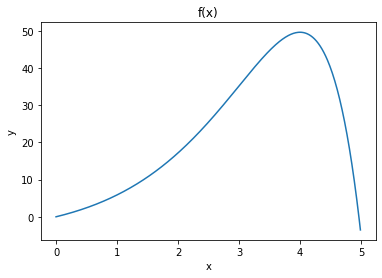

In [ ]:
# plotting the curve

def func(x):
  return (5-x)*np.exp(x)-5

x = np.arange(0,5,0.01)
y = func(x)

plt.xlabel('x')
plt.ylabel('y')
plt.title('f(x)')
plt.plot(x,y)

## a) 

*Write a bisection routine or use routine bisect available from the book’s web page to find a root of   (x) in the interval [4, 5], accurate to six
decimal places (i.e., find an interval of width at most 10−6 that contains the root, so that the midpoint of this interval is within 5 × 10−7 of the root). At each step, print out the endpoints of the smallest interval known to contain a root. Without running the code further, answer the following: How many steps would be required to reduce the size of this
interval to 10−12? Explain your answer.*

To achive the desired accuracy we need $\frac{b-a}{2^k} = 10^{-12} \rightarrow k = \log_{2}{10^{12}} = 12 \log_{2}{10} = 39.8 $ \\
Rounding up we get 40 steps. 

In [ ]:
a = 4
b = 5

error = 10**(-6)

def mid(a,b):
  return (a+b)/2

counter = 0

while b-a > error and counter < 100:
  if func(mid(a,b))*func(a) > 0:
    a = mid(a,b)
  elif func(mid(a,b))*func(b) > 0:
    b = mid(a,b)
  else:
    print('wtf')
    break
  counter += 1
  print('Step', counter ,':', [round(a,6),round(b,6)])

print('The root is:', round(mid(a,b), int(-np.log10(error))), '+/-', round((b-a)/2, 7)) # change to proper formating later

Step 1 : [4.5, 5]
Step 2 : [4.75, 5]
Step 3 : [4.875, 5]
Step 4 : [4.9375, 5]
Step 5 : [4.9375, 4.96875]
Step 6 : [4.953125, 4.96875]
Step 7 : [4.960938, 4.96875]
Step 8 : [4.964844, 4.96875]
Step 9 : [4.964844, 4.966797]
Step 10 : [4.964844, 4.96582]
Step 11 : [4.964844, 4.965332]
Step 12 : [4.965088, 4.965332]
Step 13 : [4.965088, 4.96521]
Step 14 : [4.965088, 4.965149]
Step 15 : [4.965088, 4.965118]
Step 16 : [4.965103, 4.965118]
Step 17 : [4.965111, 4.965118]
Step 18 : [4.965111, 4.965115]
Step 19 : [4.965113, 4.965115]
Step 20 : [4.965114, 4.965115]
The root is: 4.965114 +/- 5e-07


Repeating the code for $10^{-12}$:

In [ ]:
a = 4
b = 5
error = 10**(-12)
def mid(a,b):
  return (a+b)/2
counter = 0
while b-a > error and counter < 100:
  if func(mid(a,b))*func(a) > 0:
    a = mid(a,b)
  else: 
    b = mid(a,b)
  counter += 1
print('Number of steps required to achieve the accuracy of 10^-12 is:', counter)

Number of steps required to achieve the accuracy of 10^-12 is: 40


## b)

*Write a routine to use Newton’s method or use routine newton available
from the book’s web page to find a root of   (x), using initial guess x0 = 5. Print out your approximate solution xk and the value of   (xk) at each
step and run until |   (xk)| ≤ 10−8. Without running the code further, but perhaps using information from your code about the rate at which |
(xk)| is reduced, can you estimate how many more steps would be required to make |   (xk)| ≤ 10−16 (assuming that your machine carried
enough decimal places to do this)? Explain your answer.*

In [ ]:
# define the derivative of a f(x):

def der_f(x):
 return -np.exp(x)*(x-4)

x = 5 
counter = 0
while abs(func(x)) > 10**(-8):
  counter += 1
  x = x - func(x)/der_f(x)
  print('Step', counter ,':','Value:', round(x,7), 'Error:', round(func(x),11))


Step 1 : Value: 4.9663103 Error: -0.16564277761
Step 2 : Value: 4.9651157 Error: -0.00020120181
Step 3 : Value: 4.9651142 Error: -3e-10


From this we can estimate that after the 4th iteration accuracy is going to be < 10^(-10*2) = 10^(-20) which is sufficient for it to be less than 10^(-16)

## c)

*Take your routine for doing Newton’s method and modify it to run the secant method. Repeat the run of part (b), using, say, x0 = 4 and x1 = 5,
and again predict (without running the code further) how many steps
would be required to reduce | (xk)| below 10−16 (assuming that your
machine carried enough decimal places to do this) using the secant method. Explain your answer.*

In [ ]:
xn = 4
xn1 = 5
counter = 0

while abs(func(xn1)) > 10**(-8):
  xn1, xn = xn1 - func(xn1)*(xn1-xn)/(func(xn1) - func(xn)), xn1
  counter += 1
  print('Step', counter ,':','Value:', round(xn1,7), 'Error:', round(func(xn1),11)) 
  

Step 1 : Value: 4.9084218 Error: 7.40202440794
Step 2 : Value: 4.9630793 Error: 0.2808942198
Step 3 : Value: 4.9652353 Error: -0.01675049904
Step 4 : Value: 4.965114 Error: 3.473149e-05
Step 5 : Value: 4.9651142 Error: 4.28e-09


To increase precision to 10^(-16) we would need two more iterations because 10^(-9\*1.63) > 10^(-15) and 10^(-9\*1.63\*1.63) = 10^(-23) < 10^(-15)

# Problem 2. Q3

*Newton’s method can be used to compute reciprocals, without division. To compute1/R,let (x)=x−1 −Rsothat (x)=0whenx=1/R.Writedown the Newton iteration for this problem and compute (by hand or with a calculator) the first few Newton iterates for approximating 1/3, starting with x0 = 0.5, and not using any division. What happens if you start with x0 = 1?
For positive R, use the theory of fixed point iteration to determine an
interval about 1/R from which Newton’s method will converge to 1/R.*

In [ ]:
x = 0.66
counter =0
while abs(x-1/3) > 10**(-8):
  x = 2*x - 3*x**2
  counter += 1
  print('Step', counter,'Value:', round(x,11), 'Error:', round(x-1/3,11)) 


Step 1 Value: 0.0132 Error: -0.32013333333
Step 2 Value: 0.02587728 Error: -0.30745605333
Step 3 Value: 0.04974565914 Error: -0.28358767419
Step 4 Value: 0.09206742647 Error: -0.24126590686
Step 5 Value: 0.15870561989 Error: -0.17462771344
Step 6 Value: 0.24184881842 Error: -0.09148451491
Step 7 Value: 0.30822508393 Error: -0.0251082494
Step 8 Value: 0.33144206077 Error: -0.00189127256
Step 9 Value: 0.3333226026 Error: -1.073074e-05
Step 10 Value: 0.33333333299 Error: -3.5e-10


Recall, 

$|x_{n+1} - x_{*}| < \frac{|f''(x_{n})|}{|2f'(x_{n})|}|x_{n} - x_{*}|^{2} \rightarrow$ 

$ |x_{n+1} - x_{*}| < \frac{1}{C}(C|x_{0} - x_{*}|)^{2n}$, 

where $ C = \frac{|f''(1/3)|}{|2f'(1/3)|}) =3 $


Therefore it converges when $C|x_{0} - x_{*}| < 1$ or $|x_{0} - 1/3| < 1/3$

So $0<x<\frac{2}{3}$





# Problem 3. Q4

*Use Newton’s method to approximate $\sqrt2$ to 6 decimal places.*

In [ ]:
def f(x):
  return x**2-2.0

def df(x):
  return 2*x

x = 2
counter = 0
while abs(f(x)) > 10**(-6):
  x = x - f(x)/df(x)
  counter += 1
  print('Step', counter ,':','Value:', round(x,10), 'Error:', round(f(x),12)) 


Step 1 : Value: 1.5 Error: 0.25
Step 2 : Value: 1.4166666667 Error: 0.006944444444
Step 3 : Value: 1.4142156863 Error: 6.007305e-06
Step 4 : Value: 1.4142135624 Error: 5e-12


# Problem 4. Q6

## a)
*Derive a function   that has a root at the point where h achieves its minimum. Write down the formula for Newton’s method applied to*   

$f(x) = h'(x) = x^{3} - 3$, thus Newton method would have:

$x_{n+1} = x_{n} - \frac{x_{n}^{3}-3}{3x_{n}^2}$

## b)

*Take one step (by hand) with Newton’s method starting with a guess of x0 = 1.*

$x_{1} = 1 - \frac{1^{3} - 3}{3} = \frac{5}{3}$

##c)

*Take two steps (by hand) towards the root of   (i.e., the minimum of h) using bisection with a = 0, b = 4.*

1) 

$\frac{a+b}{2} = 2$

$f(2) = 5$, therefore $a_{1} = 0 $ , $b_{1} = 2$

2) 

$\frac{a_{1} + b_{1}}{2} = 1$

$f(1) = -2$

# Problem 5. Q9

*Can the bisection method be used to find the roots of the function   (x) = sin x + 1? Why or why not? Can Newton’s method be used to find the roots (or a root) of this function? If so, what will be its order of convergence and why?*

**Biscection method:**

The bisection method will not work for given f because min(f) = 0 and IMV theorem can not be implemented in this case. 

**Newton method:**

This method should work unless we start from $x_{0} = k* \frac{\pi}{2}$, where $k = 1,3,5...$ since in that case $f'(x_{0}) = 0$. The convergence rate of the method is linear $\frac{1}{2}$ for $n\rightarrow \infty$ becuase $f'(x_{*}) = 0$

